# 1. IMDB 감성분석

In [1]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [2]:
import numpy as np
import tensorflow as tf
import os

In [3]:
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}
{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [4]:
vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 위 그림과 같이 4차원의 워드 벡터를 가정합니다. 

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

encoded_sentences = get_encoded_sentences(sentences, word_to_index)

# 숫자로 변환된 텍스트 데이터 [[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 에 Embedding 레이어를 적용합니다. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')
print("raw_data : ")
print(raw_inputs)
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
print("after padding : ")
print(raw_inputs)
output = embedding(raw_inputs)

print("embedding : ")
print(output)

raw_data : 
[list([1, 3, 4, 5]) list([1, 3, 6, 7]) list([1, 8, 3, 4, 9])]
after padding : 
[[1 3 4 5 0]
 [1 3 6 7 0]
 [1 8 3 4 9]]
embedding : 
tf.Tensor(
[[[ 0.01987639  0.01407177  0.03588716  0.0386878 ]
  [ 0.03108657 -0.00679178 -0.01059975  0.04344168]
  [ 0.04528866  0.03630866 -0.02072189  0.0047208 ]
  [ 0.01830124  0.03959924 -0.04661244  0.03019363]
  [ 0.01761172 -0.01383747  0.04413981 -0.00980706]]

 [[ 0.01987639  0.01407177  0.03588716  0.0386878 ]
  [ 0.03108657 -0.00679178 -0.01059975  0.04344168]
  [ 0.03362622 -0.01770086 -0.02776437  0.02813396]
  [ 0.01013235 -0.00832324 -0.00601326  0.04166645]
  [ 0.01761172 -0.01383747  0.04413981 -0.00980706]]

 [[ 0.01987639  0.01407177  0.03588716  0.0386878 ]
  [-0.04610703  0.02582109  0.03717225 -0.00241324]
  [ 0.03108657 -0.00679178 -0.01059975  0.04344168]
  [ 0.04528866  0.03630866 -0.02072189  0.0047208 ]
  [-0.00918368 -0.01022034 -0.02538469 -0.00606364]]], shape=(3, 5, 4), dtype=float32)


In [5]:
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

훈련 샘플 개수: 25000, 테스트 개수: 25000


In [6]:
print("Review sample : ", x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

Review sample :  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  18

In [7]:
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

the
1


In [8]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다.
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

print("law sample : ")
print(x_train[0])
print("decoded sample : ")
print(get_decoded_sentence(x_train[0], index_to_word))

print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

law sample : 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
decoded sample : 
this film was just brilliant

In [9]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens) * 100))

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 94.536%가 maxlen 설정값 이내에 포함됩니다. 


In [10]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)


In [11]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


In [12]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 100  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential(name="GAP")
model.add(tf.keras.layers.Input(shape=maxlen, name="Input"))
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True, name="EMB"))
model.add(tf.keras.layers.GlobalAveragePooling1D(name="GAP1d"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", name="Classification"))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_acc",
                                        patience=3,
                                        factor=0.1)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

Model: "GAP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 EMB (Embedding)             (None, 580, 100)          1000000   
                                                                 
 GAP1d (GlobalAveragePooling  (None, 100)              0         
 1D)                                                             
                                                                 
 Classification (Dense)      (None, 1)                 101       
                                                                 
Total params: 1,000,101
Trainable params: 1,000,101
Non-trainable params: 0
_________________________________________________________________


In [13]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 100)


In [14]:
partial_x_train, partial_y_train

(array([[   1,   13,  104, ...,    0,    0,    0],
        [   1,   14,   20, ...,    0,    0,    0],
        [   1,   86,  125, ...,    0,    0,    0],
        ...,
        [   1,   11,    6, ...,    0,    0,    0],
        [   1, 1446, 7079, ...,    0,    0,    0],
        [   1,   17,    6, ...,    0,    0,    0]], dtype=int32),
 array([0, 0, 0, ..., 0, 1, 0]))

In [15]:
epochs=20 

history_gap = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[reduce_lr],
                    verbose=2)

Epoch 1/20
30/30 - 2s - loss: 0.6808 - acc: 0.7083 - val_loss: 0.6694 - val_acc: 0.7543 - lr: 0.0010 - 2s/epoch - 62ms/step
Epoch 2/20
30/30 - 0s - loss: 0.6555 - acc: 0.7689 - val_loss: 0.6455 - val_acc: 0.7679 - lr: 0.0010 - 387ms/epoch - 13ms/step
Epoch 3/20
30/30 - 0s - loss: 0.6282 - acc: 0.7865 - val_loss: 0.6190 - val_acc: 0.7801 - lr: 0.0010 - 389ms/epoch - 13ms/step
Epoch 4/20
30/30 - 0s - loss: 0.5987 - acc: 0.7965 - val_loss: 0.5919 - val_acc: 0.7932 - lr: 0.0010 - 380ms/epoch - 13ms/step
Epoch 5/20
30/30 - 0s - loss: 0.5686 - acc: 0.8107 - val_loss: 0.5642 - val_acc: 0.8024 - lr: 0.0010 - 393ms/epoch - 13ms/step
Epoch 6/20
30/30 - 0s - loss: 0.5383 - acc: 0.8267 - val_loss: 0.5372 - val_acc: 0.8119 - lr: 0.0010 - 375ms/epoch - 13ms/step
Epoch 7/20
30/30 - 0s - loss: 0.5090 - acc: 0.8363 - val_loss: 0.5104 - val_acc: 0.8182 - lr: 0.0010 - 390ms/epoch - 13ms/step
Epoch 8/20
30/30 - 0s - loss: 0.4806 - acc: 0.8463 - val_loss: 0.4856 - val_acc: 0.8318 - lr: 0.0010 - 389ms/epoch

In [ ]:
results = model.evaluate(x_test,  y_test, verbose=2)
print(results)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def show_lcurve(hists, titles, colors=["r","g","b","k"], size=(12,4), x_itv=1, lw=1):
    plt.figure(figsize=size)
    # loss 
    plt.subplot(121)
    for i, hist in enumerate(hists):
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']
        epochs = range(1, 1+len(loss))
        xbins = range(0, len(loss)+1, x_itv)
        plt.plot(epochs, loss, lw=lw,linestyle=':', label=f'{titles[i]} train loss', c=colors[i])
        plt.plot(epochs, val_loss, lw=lw,marker='.', label=f'{titles[i]} valid loss', c=colors[i])
        plt.legend();plt.grid(True);plt.xticks(xbins)
        plt.xlabel('Epochs');plt.ylabel('Loss')
        x, y = epochs[-1], hist.history['loss'][-1]
        plt.text(x, y, np.round(y,2), c=colors[i])
        x, y = epochs[-1], hist.history['val_loss'][-1]
        plt.text(x, y, np.round(y,2), c=colors[i])
    
    # acc
    plt.subplot(122)
    for i, hist in enumerate(hists):
        acc = hist.history['acc']
        val_acc = hist.history['val_acc']
        plt.plot(epochs, acc, linestyle=':', lw=lw,label=f'{titles[i]} train acc', c=colors[i])
        plt.plot(epochs, val_acc, marker='.', lw=lw,label=f'{titles[i]} valid acc', c=colors[i])
        plt.legend();plt.grid(True);plt.xticks(xbins)
        plt.xlabel('Epochs');plt.ylabel('Acc')
        x, y = epochs[-1], hist.history['acc'][-1]
        plt.text(x, y, np.round(y,2), c=colors[i])
        x, y = epochs[-1], hist.history['val_acc'][-1]
        plt.text(x, y, np.round(y,2), c=colors[i])
    plt.show()

In [ ]:
show_lcurve([history_gap], ["gap"], ["r"])

# 2. Word2Vec

## 기존에 학습했던 embedding 파라미터를 Word2Vec

In [18]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = '../data/ex8/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [19]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
print("vector shape : ", vector.shape)
print(vector)

vector shape :  (100,)
[ 0.06729073  0.02408931 -0.0672268   0.10377169 -0.10132787  0.06787209
 -0.06122455 -0.0839781  -0.10017835  0.06628327  0.03583663  0.06026181
  0.10059302  0.09976155 -0.03917942 -0.12243404 -0.07490356 -0.05160596
 -0.10415906 -0.0630994  -0.08078202 -0.12226749  0.05635112  0.08084074
  0.08825096  0.06646771 -0.10017493 -0.05706469 -0.06161306 -0.06605622
 -0.07317947 -0.08012437 -0.07688508  0.08369046  0.11883654  0.04964365
  0.04041789 -0.10597809 -0.06153584 -0.07112886 -0.09631634 -0.11245434
 -0.11811869 -0.02676919  0.07929283 -0.11214355  0.02770824  0.06723518
  0.05306452  0.09117542  0.04093561  0.07371701  0.12223455  0.0767356
 -0.07542486 -0.09309336  0.08500847  0.050916   -0.12082166 -0.05768143
 -0.12013353 -0.10853477 -0.11601014 -0.07434734 -0.06559448  0.0392463
 -0.10933106 -0.12070314 -0.04016656 -0.03608408 -0.10799761  0.1172678
  0.05763476  0.10253216 -0.05188313 -0.0722108   0.10561933  0.05605313
 -0.03201813 -0.0474074  -0.103

In [20]:
word_vectors.similar_by_word("love")

[('8', 0.9969772696495056),
 ('amazing', 0.9966987371444702),
 ('fantastic', 0.9965243339538574),
 ('great', 0.9964374303817749),
 ('incredible', 0.9964191913604736),
 ('wonderful', 0.9963559508323669),
 ('definitely', 0.9963542819023132),
 ('hilarious', 0.996330201625824),
 ('7', 0.9962878227233887),
 ('powerful', 0.996279776096344)]

## 구글의 뉴스 데이터로 학습된 Word2Vec을 다시 임베딩에 넣기

In [21]:
from gensim.models import KeyedVectors

word2vec_path = '../data/ex8/GoogleNews-vectors-negative300.bin'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
print("vector shape : ", vector.shape)
print(vector)

vector shape :  (300,)
[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
  

In [22]:
word2vec.similar_by_word("love")

[('loved', 0.6907792091369629),
 ('adore', 0.6816874146461487),
 ('loves', 0.6618633270263672),
 ('passion', 0.6100709438323975),
 ('hate', 0.6003956198692322),
 ('loving', 0.5886635184288025),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547305345535278),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

In [23]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [24]:
from tensorflow.keras.initializers import Constant

# 모델 구성
model = tf.keras.Sequential(name="google")
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "google"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 580, 300)          3000000   
                                                                 
 conv1d (Conv1D)             (None, 574, 16)           33616     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 114, 16)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 108, 16)           1808      
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 8)                 136  

In [25]:
# 학습의 진행
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_acc",
                                        patience=3,
                                        factor=0.1)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['acc'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과callbacks=서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[reduce_lr],
                    verbose=2)

Epoch 1/20
30/30 - 33s - loss: 0.6974 - acc: 0.5374 - val_loss: 0.6812 - val_acc: 0.5664 - lr: 0.0010 - 33s/epoch - 1s/step
Epoch 2/20
30/30 - 32s - loss: 0.6633 - acc: 0.6058 - val_loss: 0.6910 - val_acc: 0.5378 - lr: 0.0010 - 32s/epoch - 1s/step
Epoch 3/20
30/30 - 32s - loss: 0.6099 - acc: 0.6805 - val_loss: 0.5660 - val_acc: 0.7482 - lr: 0.0010 - 32s/epoch - 1s/step
Epoch 4/20
30/30 - 32s - loss: 0.5138 - acc: 0.7684 - val_loss: 0.4636 - val_acc: 0.8111 - lr: 0.0010 - 32s/epoch - 1s/step
Epoch 5/20
30/30 - 32s - loss: 0.4292 - acc: 0.8165 - val_loss: 0.4556 - val_acc: 0.7840 - lr: 0.0010 - 32s/epoch - 1s/step
Epoch 6/20
30/30 - 32s - loss: 0.3699 - acc: 0.8410 - val_loss: 0.3770 - val_acc: 0.8392 - lr: 0.0010 - 32s/epoch - 1s/step
Epoch 7/20
30/30 - 32s - loss: 0.3309 - acc: 0.8612 - val_loss: 0.3489 - val_acc: 0.8525 - lr: 0.0010 - 32s/epoch - 1s/step
Epoch 8/20
30/30 - 32s - loss: 0.2857 - acc: 0.8821 - val_loss: 0.3846 - val_acc: 0.8233 - lr: 0.0010 - 32s/epoch - 1s/step
Epoch 9/

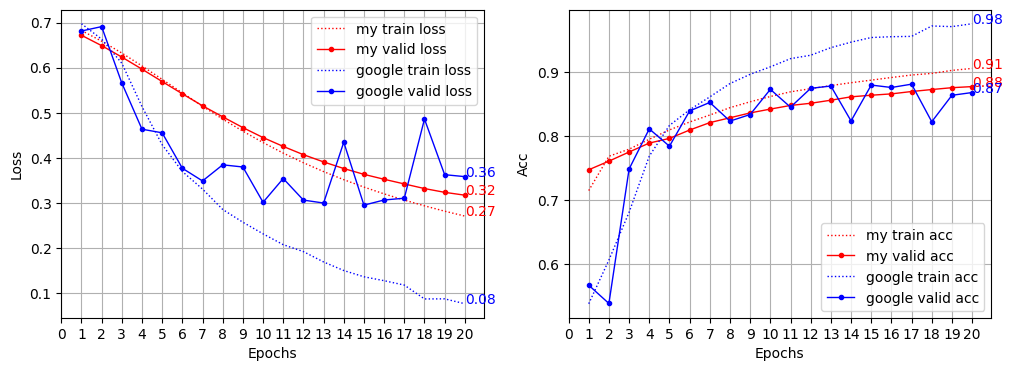

In [26]:
show_lcurve([history_gap, history], ["my","google"], ["r","b"])

In [27]:
results = model.evaluate(x_test,  y_test, verbose=2)
print(results)

782/782 - 8s - loss: 0.3766 - acc: 0.8597 - 8s/epoch - 10ms/step
[0.37656739354133606, 0.8596799969673157]
